In [67]:
%%capture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df= pd.read_csv("/Users/pouya/Machine Learning Course/train_Titanic.csv")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [39]:
df.shape

(891, 12)

In [40]:
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [41]:
def f(Name):
    if '.'in Name:
        return Name.split(',')[1].split('.')[0].strip()
    else:
        return 'Uknown'

In [42]:
def g(tt):
    if tt in ['Mr']:
        return 1
    elif tt in ['Master']:
        return 3
    elif tt in ['Ms','Miss','Mlle']:
        return 4
    elif tt in ['Mrs','Mme']:
        return 5
    else:
        return 2

In [43]:
df['title']= df['Name'].apply(f).apply(g)
df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,5
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,4
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,5
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [44]:
t= pd.crosstab(df['title'],df['Survived'])
t

Survived,0,1
title,,
1,436,81
2,15,8
3,17,23
4,55,130
5,26,100


In [45]:
t_pct= t.div(t.sum(1).astype(float),axis=0)
t_pct

Survived,0,1
title,,
1,0.843327,0.156673
2,0.652174,0.347826
3,0.425000,0.575000
4,0.297297,0.702703
5,0.206349,0.793651


Text(0, 0.5, 'Survival rate')

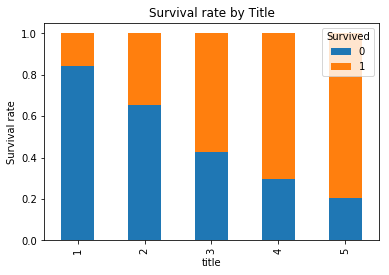

In [46]:
t_pct.plot(kind='bar',stacked=True, title='Survival rate by Title')
plt.xlabel('title')
plt.ylabel('Survival rate')

In [47]:
df = df.drop(['PassengerId','Name','Ticket'],axis=1)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,title
0,3,male,22.0,1,0,7.2500,NaN,S,0,1
1,1,female,38.0,1,0,71.2833,C85,C,1,5
2,3,female,26.0,0,0,7.9250,NaN,S,1,4
3,1,female,35.0,1,0,53.1000,C123,S,1,5
4,3,male,35.0,0,0,8.0500,NaN,S,0,1


In [48]:
edt= pd.get_dummies(df['Embarked'])
edt

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [49]:
edt.drop(['S'],axis=1, inplace=True)

In [53]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,title,C,Q
0,3,male,22.0,1,0,7.2500,NaN,S,0,1,0,0
1,1,female,38.0,1,0,71.2833,C85,C,1,5,1,0
2,3,female,26.0,0,0,7.9250,NaN,S,1,4,0,0
3,1,female,35.0,1,0,53.1000,C123,S,1,5,0,0
4,3,male,35.0,0,0,8.0500,NaN,S,0,1,0,0
5,3,male,NaN,0,0,8.4583,NaN,Q,0,1,0,1
6,1,male,54.0,0,0,51.8625,E46,S,0,1,0,0
7,3,male,2.0,3,1,21.0750,NaN,S,0,3,0,0
8,3,female,27.0,0,2,11.1333,NaN,S,1,5,0,0
9,2,female,14.0,1,0,30.0708,NaN,C,1,5,1,0


In [52]:
df= df.join(edt)
df.head

ValueError: columns overlap but no suffix specified: Index(['C', 'Q'], dtype='object')

In [54]:
#example groupby

In [74]:
df= pd.DataFrame({'Bird':['A','A','B','B','B'],'Speed':[380,370,24,26,np.nan]})
df

,Bird,Speed
0,A,380.0
1,A,370.0
2,B,24.0
3,B,26.0
4,B,NaN


In [75]:
df.groupby(['Bird']).mean()

,Speed
Bird,
A,375.0
B,25.0


In [76]:
df['Speed']= df.groupby(['Bird'])['Speed'].transform(lambda x: x.fillna(x.mean()))
df

,Bird,Speed
0,A,380.0
1,A,370.0
2,B,24.0
3,B,26.0
4,B,25.0
